The following is based on:
- https://course.spacy.io/en/chapter1
- https://stackabuse.com/python-for-nlp-tokenization-stemming-and-lemmatization-with-spacy-library/
- https://stackabuse.com/removing-stop-words-from-strings-in-python/

# 3. Introduction to spaCy

spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python. It’s designed specifically for production use and helps you build applications that process and “understand” large volumes of text. It can be used to build information extraction or natural language understanding systems (https://spacy.io/usage/facts-figures). Its easy-to-use features and intuitive APIs are what make it highly popular and attractive.

## 3.1. nlp object

At the center of spaCy is the object containing the processing pipeline. We usually call this variable "nlp".

For example, to create an English nlp object, you can import the English language class from spacy.lang.en and instantiate it. 

You can use the nlp object like a function to analyze text. It contains all the different components in the pipeline. It also includes language-specific rules used for tokenizing the text into words and punctuation. spaCy supports a variety of languages that are available in spacy.lang

In [3]:
# Import the English language class
from spacy.lang.en import English

# Create the nlp object
nlp = English()

## 3.2. Documents, spans and tokens

### Doc object

When you process a text with the nlp object, spaCy creates a Doc object – short for "document". The Doc lets you access information about the text in a structured way, and no information is lost.

The Doc behaves like a normal Python sequence by the way and lets you iterate over its tokens, or get a token by its index. But more on that later!

In [4]:
# Created by processing a string of text with the nlp object
doc = nlp("Hello world!")

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

Hello
world
!


### Token object

<div align="center">
    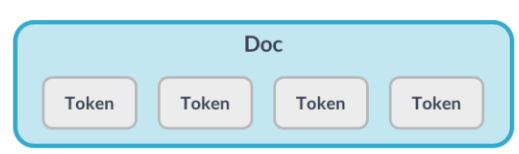
</div>

Token objects represent the tokens in a document – for example, a word or a punctuation character.

In [5]:
doc = nlp("Hello world!")

# Index into the Doc to get a single Token
token = doc[1]
# Get the token text via the .text attribute
print(token.text)

world


### Span object

A Span object is a slice of the document consisting of one or more tokens. It's only a view of the Doc and doesn't contain any data itself.

<div align="center">
    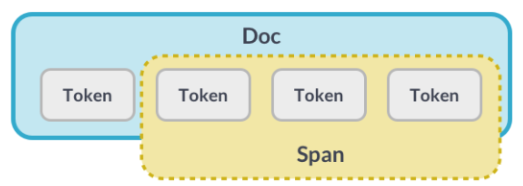
</div>


In [6]:
doc = nlp("Hello world!")

# A slice from the Doc is a Span object
span = doc[1:4]

# Get the span text via the .text attribute
print(span.text)

world!


## 3.3. Lexical attributes

We have seen that "text" returns the token text. "text" is what is called a "lexical attribute". Lexical attributes refer to the entry in the vocabulary and don't depend on the token's context. Here is an example of other lexical attributes:

In [7]:
doc = nlp("It costs $50.")

print('Index:   ', [token.i for token in doc])
print('Text:    ', [token.text for token in doc])

print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4]
Text:     ['It', 'costs', '$', '50', '.']
is_alpha: [True, True, False, False, False]
is_punct: [False, False, False, False, True]
like_num: [False, False, False, True, False]


## 3.4. Stemming

Stemming refers to reducing a word to its root form. While performing natural language processing tasks, you will encounter various scenarios where you find different words with the same root. For instance, compute, computer, computing, computed, etc. You may want to reduce the words to their root form for the sake of uniformity. This is where stemming comes in to play.

It might be surprising to you but spaCy doesn't contain any function for stemming as it relies on lemmatization only. Therefore, in this section, we will use NLTK for stemming.

There are two types of stemmers in NLTK: Porter Stemmer and Snowball stemmers. Both of them have been implemented using different algorithms.

In [8]:
import nltk

from nltk.stem.porter import *
stemmer = PorterStemmer()
tokens = ['compute', 'computer', 'computed', 'computing']
for token in tokens:
    print(token + ' --> ' + stemmer.stem(token))

ModuleNotFoundError: No module named 'nltk'

"comput" actually isn't a dictionary word.

This is where lemmatization comes handy. Lemmatization reduces the word to its stem as it appears in the dictionary. The stems returned through lemmatization are actual dictionary words and are semantically complete unlike the words returned by stemmer.

## 3.5. Statistical models

Some of the most interesting things you can analyze are context-specific: for example, whether a word is a verb or whether a span of text is a person name.

Statistical models enable spaCy to make predictions in context. This usually includes part-of speech tags, syntactic dependencies and named entities.

Models are trained on large datasets of labeled example texts. They can be updated with more examples to fine-tune their predictions – for example, to perform better on your specific data.

spaCy provides a number of pre-trained model packages you can download using the "spacy download" command. For example, the "en_core_web_sm" package is a small English model that supports all core capabilities and is trained on web text.

## 3.6. Lemmatization

Though we could not perform stemming with spaCy, we can perform lemmatization using spaCy. To do so, we need to use the lemma_ attribute on the spaCy document. 

In [ ]:
import spacy
#! spacy download en_core_web_md
nlp = spacy.load('en_core_web_md')

doc = nlp('compute computer computed computing')
for token in doc:
    print(token.text, token.lemma_)

You can see that unlike stemming where the root we got was "comput", the roots that we got here are actual words in the dictionary.


## 3.7. Sentence segmentation

If you have multiple sentences in a text and you want to separate each of the sentences and print the output, then Sentence segmentation comes in handy.

In [ ]:
doc = nlp('This is a first sentence! And here is a second. And a third...')

for sent in doc.sents:
    print(sent.text)

## 3.8. Part of speech tagging

In this example, we're using spaCy to predict part-of-speech tags, the word types in context.

First, we load the small English model and receive an nlp object. Next, we're processing the text "She ate the pizza".

For each token in the Doc, we can print the text and the "pos underscore" attribute, the predicted part-of-speech tag.

In spaCy, attributes that return strings usually end with an underscore – attributes without the underscore return an ID.

Here, the model correctly predicted "ate" as a verb and "pizza" as a noun.

In [ ]:
#! spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")

doc = nlp("She ate the pizza")

for token in doc:
    print(token.text, token.pos_)

## 3.9. Syntactic dependencies

In addition to the part-of-speech tags, we can also predict how the words are related. For example, whether a word is the subject of the sentence or an object.

The "dep underscore" attribute returns the predicted dependency label. The head attribute returns the syntactic head token. You can also think of it as the parent token this word is attached to.

In [ ]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

To describe syntactic dependencies, spaCy uses a standardized label scheme. Here's an example of some common labels:

- The pronoun "She" is a nominal subject attached to the verb – in this case, to "ate".
- The noun "pizza" is a direct object attached to the verb "ate". It is eaten by the subject, "she".
- The determiner "the", also known as an article, is attached to the noun "pizza".

In [ ]:
from spacy import displacy

displacy.render(doc, style="dep")

## 3.10. Named entities recognition

Named entities are "real world objects" that are assigned a name – for example, a person, an organization or a country.

The doc dot ents property lets you access the named entities predicted by the model. It returns an iterator of Span objects, so we can print the entity text and the entity label using the "label underscore" attribute.

In this case, the model is correctly predicting "Apple" as an organization, "U.K." as a geopolitical entity and "$1 billion" as money.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

doc = nlp(u"Apple is looking at buying U.K. startup for $1 billion")

for ent in doc.ents:
    print(ent.text, ent.label_)

In [ ]:
displacy.render(doc, style="ent")

A quick tip: To get definitions for the most common tags and labels, you can use the spacy dot explain helper function. For example, "GPE" for geopolitical entity isn't exactly intuitive – but spacy dot explain can tell you that it refers to countries, cities and states. The same works for part-of-speech tags and dependency labels

In [ ]:
spacy.explain('ORG')

In [ ]:
nlp.pipe_labels['ner']

## 3.11. Stop words

Stop words are those words in natural language that have a very little meaning, such as "is", "an", "the", etc. Stop words are often removed from the text before training machine learning models since stop words occur in abundance, hence providing little to no information that can be used for modelling.

We first load the language model and store it in the nlp variable. The nlp.Default.stop_words is a set of default stop words for English language model in SpaCy. Next, we simply iterate through each word in the input text and if the word exists in the stop word set of the SpaCy language model, the word is removed.

In [ ]:
nlp = spacy.load('en_core_web_sm')

all_stopwords = nlp.Defaults.stop_words

text = "Nick likes to play football, however he is not too fond of tennis."
tokens_without_sw = [word for word in nlp(text) if word.text not in all_stopwords]

print(tokens_without_sw)

We have seen some features of spaCy but it can do so much more! Refer to https://spacy.io/usage to discover more about spaCy.

## 3.12. Exercises

### Getting Started

Let’s get started and try out spaCy!

Import the English class from spacy.lang.en and create the nlp object.

Create a doc and print its text.

In [ ]:
# Import spaCy
import ____

# Create the English nlp object
nlp = ____

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(____.text)

In [2]:
# SOLUTION

# Import spaCy
import spacy

# Create the English nlp object
nlp = spacy.blank("en")

# Process a text
doc = nlp("This is a sentence.")

# Print the document text
print(doc.text)

This is a sentence.


### Documents, Spans and Tokens

When you call nlp on a string, spaCy first tokenizes the text and creates a document object. In this exercise, you’ll learn more about the Doc, as well as its views Token and Span.

Import the English language class and create the nlp object.

Process the text and instantiate a Doc object in the variable doc.

Select the first token of the Doc and print its text.

In [ ]:
# Import spaCy and create the English nlp object
import ____

nlp = ____

# Process the text
doc = ____("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[____]

# Print the first token's text
print(first_token.____)

In [3]:
# SOLUTION

# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# Select the first token
first_token = doc[0]

# Print the first token's text
print(first_token.text)

I


Import the English language class and create the nlp object.

Process the text and instantiate a Doc object in the variable doc.

Create a slice of the Doc for the tokens “tree kangaroos” and “tree kangaroos and narwhals”.

In [ ]:
# Import spaCy and create the English nlp object
import ____

nlp = ____

# Process the text
doc = ____("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = ____
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = ____
print(tree_kangaroos_and_narwhals.text)

In [4]:
# SOLUTION

# Import spaCy and create the English nlp object
import spacy

nlp = spacy.blank("en")

# Process the text
doc = nlp("I like tree kangaroos and narwhals.")

# A slice of the Doc for "tree kangaroos"
tree_kangaroos = doc[2:4]
print(tree_kangaroos.text)

# A slice of the Doc for "tree kangaroos and narwhals" (without the ".")
tree_kangaroos_and_narwhals = doc[2:6]
print(tree_kangaroos_and_narwhals.text)

tree kangaroos
tree kangaroos and narwhals


### Predicting Linguistic Annotations

You’ll now get to try one of spaCy’s pre-trained model packages and see its predictions in action.

Process the text with the nlp object and create a doc.

For each token, print the token text, the token’s .pos (part-of-speech tag) and the token’s .dep (dependency label).

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = ____

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = ____.____
    token_pos = ____.____
    token_dep = ____.____
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

In [7]:
# SOLUTION

import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print(f"{token_text:<12}{token_pos:<10}{token_dep:<10}")

It          PRON      nsubj     
’s          VERB      ROOT      
official    ADJ       acomp     
:           PUNCT     punct     
Apple       PROPN     nsubj     
is          AUX       ROOT      
the         DET       det       
first       ADJ       amod      
U.S.        PROPN     nmod      
public      ADJ       amod      
company     NOUN      attr      
to          PART      aux       
reach       VERB      relcl     
a           DET       det       
$           SYM       quantmod  
1           NUM       compound  
trillion    NUM       nummod    
market      NOUN      compound  
value       NOUN      dobj      


Process the text and create a doc object.

Iterate over the doc.ents and print the entity text and label_ attribute.

In [ ]:
import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = ____
s
# Iterate over the predicted entities
for ent in ____.____:
    # Print the entity text and its label
    print(ent.____, ____.____)

In [8]:
# SOLUTION

import spacy

nlp = spacy.load("en_core_web_sm")

text = "It’s official: Apple is the first U.S. public company to reach a $1 trillion market value"

# Process the text
doc = nlp(text)

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)

Apple ORG
first ORDINAL
U.S. GPE
$1 trillion MONEY
